In [1]:
from textblob import TextBlob
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json('dataset/All_Beauty_5.json', lines = True)

In [3]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,NaN,NaN
1,5,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,NaN,NaN
2,1,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Adam,I bought this to smell nice after I shave. Wh...,Smells awful,1376784000,NaN,NaN
3,5,False,"05 3, 2011",A2UEO5XR3598GI,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.,1304380800,25,NaN
4,5,True,"05 6, 2011",A3SFRT223XXWF7,B00006L9LC,{'Size:': ' 200ml/6.7oz'},C. C. Christian,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo,1304640000,3,NaN


In [4]:
df = df[['overall', 'verified', 'reviewTime', 'reviewText', 'summary']]
df.head()

,overall,verified,reviewTime,reviewText,summary
0,5,True,"09 1, 2016",As advertised. Reasonably priced,Five Stars
1,5,True,"11 14, 2013",Like the oder and the feel when I put it on my...,Good for the face
2,1,True,"08 18, 2013",I bought this to smell nice after I shave. Wh...,Smells awful
3,5,False,"05 3, 2011",HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.
4,5,True,"05 6, 2011",If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo


In [5]:
df['reviewTime'] = pd.to_datetime(df['reviewTime']).dt.strftime('%Y')

In [6]:
df.head()

,overall,verified,reviewTime,reviewText,summary
0,5,True,2016,As advertised. Reasonably priced,Five Stars
1,5,True,2013,Like the oder and the feel when I put it on my...,Good for the face
2,1,True,2013,I bought this to smell nice after I shave. Wh...,Smells awful
3,5,False,2011,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.
4,5,True,2011,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo


In [7]:
df['reviewTime'].max()

'2018'

<AxesSubplot:>

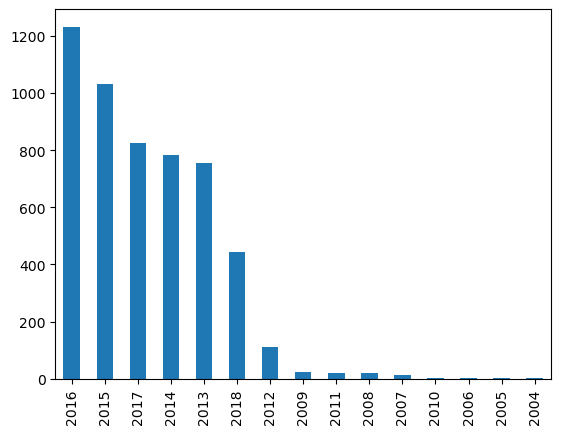

In [8]:
df['reviewTime'].value_counts().plot(kind = 'bar')

In [9]:
TextBlob('I love this product').sentiment.polarity

0.5

In [10]:
TextBlob('I hate this product').sentiment.polarity

-0.8

In [11]:
TextBlob('I bought this product').sentiment.polarity

0.0

In [12]:
def sentiment_analysis(text):
    review = TextBlob(str(text)).sentiment.polarity
    text = 'Neutral'
    if review < 0:
        text = 'Negative'
    if review > 0:
        text = 'Positive'
    return text

In [13]:
df['Polarity'] = df['reviewText'].apply(lambda x : sentiment_analysis(x))

In [14]:
df.head()

,overall,verified,reviewTime,reviewText,summary,Polarity
0,5,True,2016,As advertised. Reasonably priced,Five Stars,Positive
1,5,True,2013,Like the oder and the feel when I put it on my...,Good for the face,Negative
2,1,True,2013,I bought this to smell nice after I shave. Wh...,Smells awful,Negative
3,5,False,2011,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.,Positive
4,5,True,2011,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo,Positive
